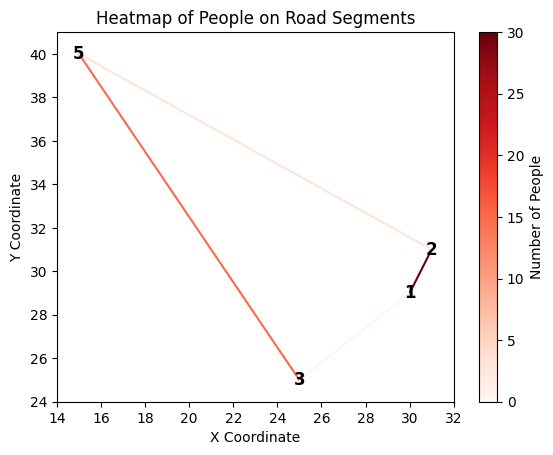

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

# 路段人数和端点坐标数据
segment_people = {'1_2': 30, '3_5': 15, '1_3': 0, '2_5': 3}
endpoint_coords = {'1': (30, 29), '2': (31, 31), '3': (25, 25), '5': (15, 40)}

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 准备绘制线段的起点和终点坐标
lines = []
for segment, people_count in segment_people.items():
    start_point = endpoint_coords[segment.split('_')[0]]
    end_point = endpoint_coords[segment.split('_')[1]]
    lines.append([(start_point[0], start_point[1]), (end_point[0], end_point[1])])

# 准备颜色映射
norm = mcolors.Normalize(vmin=min(segment_people.values()), vmax=max(segment_people.values()))
cmap = plt.cm.Reds  # 选择一个颜色映射，例如'Reds'

# 创建线段集合
line_segments = LineCollection(lines, cmap=cmap, norm=norm)

# 设置线段的颜色，根据人数映射到颜色
line_segments.set_array(list(segment_people.values()))

# 添加线段到坐标轴
ax.add_collection(line_segments)

# 设置坐标轴范围
ax.set_xlim(min(endpoint_coords.values(), key=lambda x: x[0])[0] - 1, max(endpoint_coords.values(), key=lambda x: x[0])[0] + 1)
ax.set_ylim(min(endpoint_coords.values(), key=lambda x: x[1])[1] - 1, max(endpoint_coords.values(), key=lambda x: x[1])[1] + 1)

# 在节点上标注号码
for node, (x, y) in endpoint_coords.items():
    ax.annotate(node, (x, y), fontsize=12, ha='center', va='center', color='black', fontweight='bold')

# 添加颜色条
cbar = plt.colorbar(line_segments, ax=ax)
cbar.set_label('Number of People')

# 设置标题和标签等
plt.title('Heatmap of People on Road Segments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 显示图形
plt.show()
